In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [37]:
x = 6 * np.random.rand(200, 1)-3
y = 0.8 * x ** 2 + 0.9 * x + 2 + np.random.randn(200, 1)

Text(0, 0.5, 'Y')

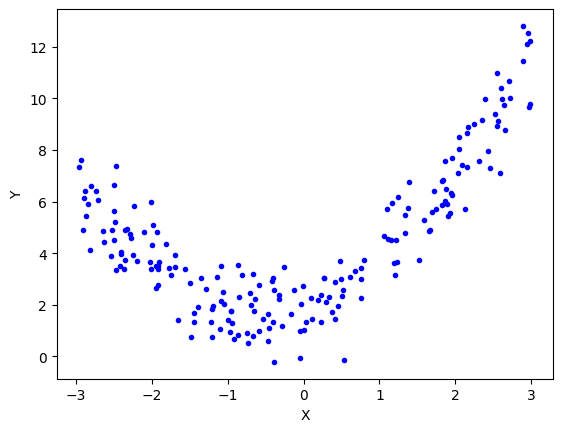

In [38]:
plt.plot(x,y, 'b.')
plt.xlabel('X')
plt.ylabel('Y')

In [40]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [41]:
len(x_train)

160

In [42]:
len(x_test)

40

In [43]:
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [44]:
y_prediction = linear_regression.predict(x_test)

In [45]:
r2_score_lr_model = r2_score(y_test, y_prediction)
print(r2_score_lr_model)

0.39093379913471493


Text(0, 0.5, 'Y')

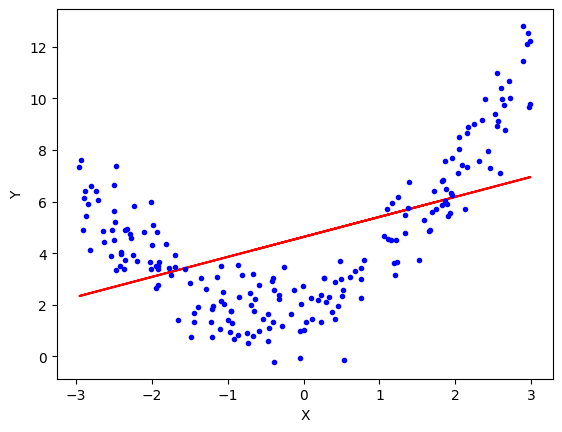

In [46]:
plt.plot(x_train, linear_regression.predict(x_train), color='r')
plt.plot(x, y,'b.')
plt.xlabel('X')
plt.ylabel('Y')

In [65]:
# Applying Polynomial Linear Regression
polynomial_regression =  PolynomialFeatures(degree=2, include_bias=True)

In [66]:
x_train_transform = polynomial_regression.fit_transform(x_train)
x_test_transform = polynomial_regression.transform(x_test)

In [67]:
print(x_train[0])

[1.73884087]


In [68]:
print(x_train_transform[0])

[1.         1.73884087 3.02356756]


In [69]:
linear_regression = LinearRegression()
linear_regression.fit(x_train_transform, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [70]:
y_prediction = linear_regression.predict(x_test_transform)

In [71]:
r2_score(y_test, y_prediction)

0.8247385794465507

In [72]:
print(linear_regression.coef_)

[[0.         0.84050132 0.83834119]]


In [73]:
print(linear_regression.intercept_)

[1.91741635]


In [74]:
x_new = np.linspace(-3, 3, 200).reshape(200, 1)

In [75]:
x_new_polynomial_regression = polynomial_regression.transform(x_new)

In [76]:
y_new = linear_regression.predict(x_new_polynomial_regression)

Text(0, 0.5, 'Y')

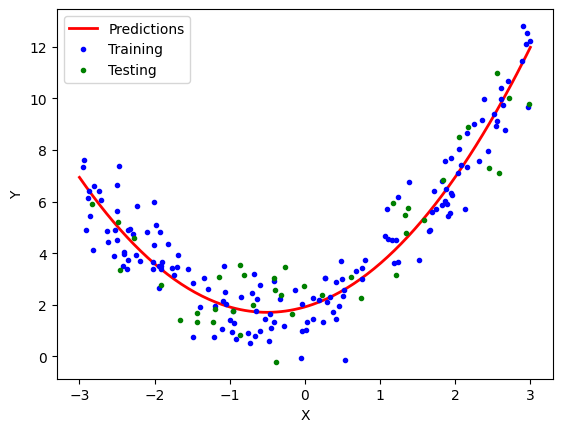

In [81]:
plt.plot(x_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.plot(x_train, y_train, 'b.', label='Training')
plt.plot(x_test, y_test, 'g.', label='Testing')
plt.xlabel('X')
plt.legend()
plt.ylabel('Y')

In [82]:
# Visualizing data using 3D plot
x = 7 * np.random.rand(100, 1)-2.8
y = 7 * np.random.rand(100, 1)-2.8

In [83]:
z = x ** 2 + y ** 2 + 0.2 * x + 0.2 * y + 0.1 * x * y + 2 + np.random.rand(100, 1)

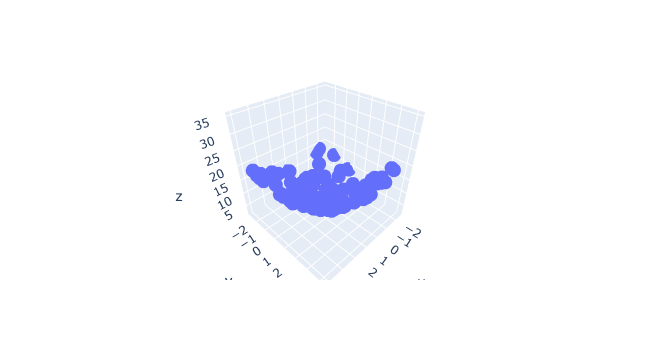

In [84]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()